# [A Deeper Understanding of Deep Learning](https://www.kaggle.com/dansbecker/a-deeper-understanding-of-deep-learning/)

Time for another mini-movie!  
In this video, Dan introduces [stochastic gradient descent (SGD)](https://en.wikipedia.org/wiki/Stochastic_gradient_descent) and [back-propagation](http://colah.github.io/posts/2015-08-Backprop/) and explains how they are used to set the weights in a deep learning model.

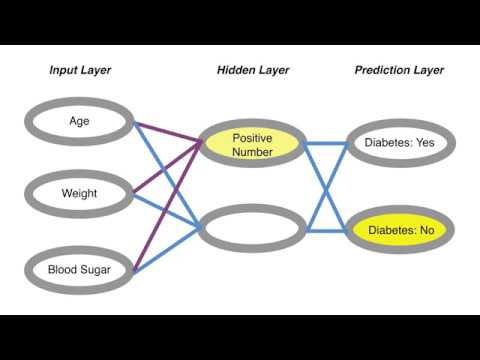

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo('kQmHaI5Jw1c', width=800, height=450)

Here is the [ReLU activation function link](https://www.kaggle.com/dansbecker/rectified-linear-units-relu-in-deep-learning) that Dan mentioned.  
Now, get ready to train your own models from scratch.

# [Deep Learning From Scratch](https://www.kaggle.com/dansbecker/deep-learning-from-scratch)

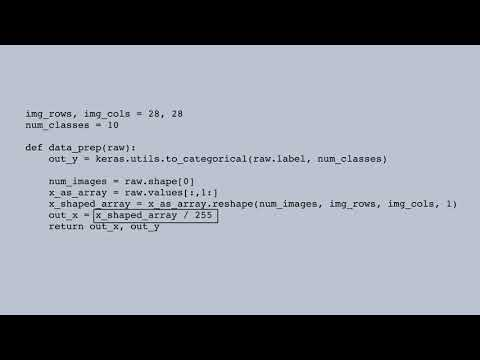

In [2]:
from IPython.display import YouTubeVideo
YouTubeVideo('YbNE3zhtsoo', width=800, height=450)

In [3]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, Dropout

img_rows, img_cols = 28, 28
num_classes = 10

def data_prep(raw):
    out_y = keras.utils.to_categorical(raw.label, num_classes)
    num_images = raw.shape[0]
    x_as_array = raw.values[:, 1:]
    x_shaped_array = x_as_array.reshape(num_images, img_rows, img_cols, 1)
    out_x = x_shaped_array / 255
    return out_x, out_y

train_file = 'inputs/digit_recognizer/train.csv'
raw_data = pd.read_csv(train_file)
x, y = data_prep(raw_data)
print(x[0], y[0])

/Users/benjamingrove/.pyenv/versions/3.6.1/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


[[[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]]

 [[0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0.        ]
  [0. 

Let's build our model:

In [4]:
model = Sequential()
model.add(Conv2D(20, kernel_size=(3, 3),
                activation='relu',
                input_shape=(img_rows, img_cols, 1)))
model.add(Conv2D(20, kernel_size=(3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

Compile and fit:

In [5]:
model.compile(loss=keras.losses.categorical_crossentropy,
             optimizer='adam',
             metrics=['accuracy'])

model.fit(x, y,
         batch_size=128,
         epochs=2,
         validation_split=0.2)

Train on 33600 samples, validate on 8400 samples
Epoch 1/2
33600/33600 [==============================] - 26s 786us/step - loss: 0.2224 - acc: 0.9362 - val_loss: 0.0741 - val_acc: 0.9779
Epoch 2/2
33600/33600 [==============================] - 26s 785us/step - loss: 0.0549 - acc: 0.9834 - val_loss: 0.0689 - val_acc: 0.9788


You know the drill, practice makes perfect!

# [Exercise: Modeling from Scratch](https://www.kaggle.com/dansbecker/exercise-modeling-from-scratch)

You have seen how to build a model from scratch to identify handwritten digits.  
Now it's time to build a model that can identify different types of clothing.  
To make models that can be trained quickly, we'll work with low-resolution (and therefore small) images.  
For example, the model will identify the image below as a shoe:

![low_res_shoe](img/low_res_shoe.png)

### Data Preparation

In [6]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.python import keras

img_rows, img_cols = 28, 28
num_classes = 10

def prep_data(raw, train_size, val_size):
    y = raw[:, 0]
    out_y = keras.utils.to_categorical(y, num_classes)
    x = raw[:, 1:]
    num_images = raw.shape[0]
    out_x = x.reshape(num_images, img_rows, img_cols, 1)
    out_x = out_x / 255
    return out_x, out_y

fashion_file = 'inputs/fashionmnist/train.csv'
fashion_data = np.loadtxt(fashion_file, skiprows=1, delimiter=',')
x, y = prep_data(fashion_data, train_size=50000, val_size=5000)

### Specify Model

**STEPS:**  
1. Create a `Sequential` model. Call it `fashion_model`.
2. Add 3 `Conv2D` layers to `fashion_model`. Give each layer 12 filters, and specify a kernel_size of 3 and a *relu* activation. You will need to specify the `input_shape` for the first `Conv2D` layer. The input shape in this case is `(img_rows, img_cols, 1)`.
3. Add a `Flatten` layer to `fashion_model` after the last `Conv2D` layer.
4. Add a `Dense` layer with 100 neurons to `fashion_model` after the `Flatten` layer.
5. Add your prediction layer to `fashion_model`. This is a `Dense` layer. We alrady have a variable called `num_classes`. Use this variable when specifying the number of nodes in this layer. The activation should be `softmax` (or you will have problems later).

In [8]:
from tensorflow.python import keras
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D

fashion_model = Sequential()
fashion_model.add(Conv2D(12, kernel_size = (3, 3),
                        activation='relu',
                        input_shape=(img_rows, img_cols, 1)))
fashion_model.add(Conv2D(12, kernel_size=(3,3), activation='relu'))
fashion_model.add(Conv2D(12, kernel_size=(3,3), activation='relu'))
fashion_model.add(Flatten())
fashion_model.add(Dense(100, activation='relu'))
fashion_model.add(Dense(num_classes, activation='softmax'))
fashion_model

### Compile Model